In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [284]:
gene_symbols = data["gene-symbol"].values

In [272]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...,...,...
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

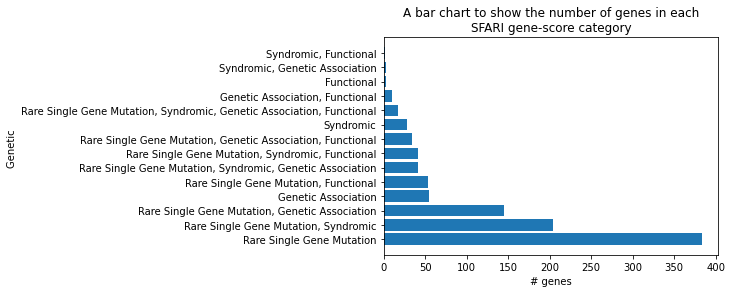

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

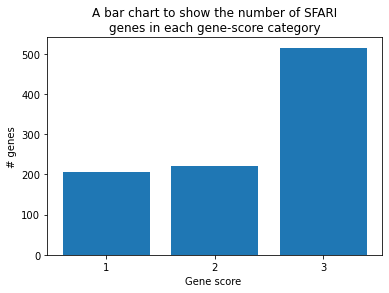

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1', '2', '3', 'NaN']


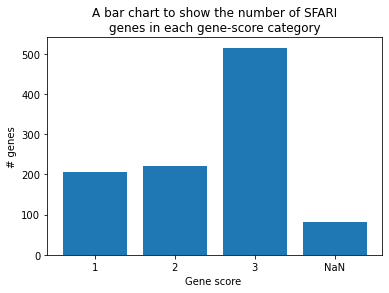

In [287]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = ["1", "2", "3", "NaN"]#[str(int(val)) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [157]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [229]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [ ]:
# Getting gene-names and ensemblIDs for the above genes^

In [285]:
gs = data["gene-symbol"]
ensembls = []
names = []

for g in gene_symbols:
    idx = gs[gs == g].index[0]
    ensembls.append(data["ensembl-id"].iloc[idx])
    names.append(data["gene-name"].iloc[idx])

In [ ]:
# load data manually from CSVs

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

In [ ]:
# load data dynamically from NCBI

In [165]:
for i in tqdm(gene_symbols):
    i

100%|██████████████████████████████████| 1023/1023 [00:00<00:00, 5138650.29it/s]


In [ ]:
Entrez.email = "s1803764@ed.ac.uk"
all_gene_dates = []

for j, g in tqdm(enumerate(gene_symbols)):
    print(j)
    handle = Entrez.esearch(db="pubmed",retmax=10000, term=f"({g}[TW] OR {names[j]}[TW] OR {ensembls[j]}[TW]) AND (autism[MH] OR autistic[MH] OR ASD[TW] OR \"autism spectrum disorder\"[TW] OR \"pervasive developmental disorder\"[TW] OR PDD-NOS[TW] OR PDD[TW] OR asperger[MH])")
    record = Entrez.read(handle)
    ids = list(set(record["IdList"]))
    #print(record["ErrorList"]["PhraseNotFound"])

    dates = []
    for i in tqdm(ids):
        handle2 = Entrez.esummary(db="pubmed", retmax=10000, id=i)
        meta_data = Entrez.read(handle2)[0]
        #print(meta_data["PubDate"])
        #print(meta_data["Title"])
        dates.append(meta_data["PubDate"][0:4])

    all_gene_dates.append(dates)
    #all_gene_dates[j] = dates

0it [00:00, ?it/s]

0



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.83it/s]
1it [00:02,  2.81s/it]

1



0it [00:00, ?it/s]
2it [00:03,  1.54s/it]

2



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.70it/s]
3it [00:06,  2.22s/it]

3



0it [00:00, ?it/s]
4it [00:07,  1.60s/it]

4



100%|███████████████████████████████████████████| 24/24 [00:13<00:00,  1.81it/s]
5it [00:21,  6.03s/it]

5



0it [00:00, ?it/s]
6it [00:21,  4.26s/it]

6



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
7it [00:23,  3.50s/it]

7



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.59it/s]
8it [00:27,  3.59s/it]

8



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
9it [00:28,  2.83s/it]

9



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]
10it [00:29,  2.31s/it]

10



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.75it/s]
11it [00:37,  4.08s/it]

11



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
12it [00:39,  3.24s/it]

12



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]
13it [00:40,  2.72s/it]

13



0it [00:00, ?it/s]
14it [00:41,  2.08s/it]

14



100%|███████████████████████████████████████████| 42/42 [00:24<00:00,  1.73it/s]
15it [01:06,  8.97s/it]

15



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
16it [01:08,  6.81s/it]

16



100%|███████████████████████████████████████████| 47/47 [00:27<00:00,  1.72it/s]
17it [01:36, 13.21s/it]

17



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.76it/s]
18it [01:42, 10.98s/it]

18



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
19it [01:44,  8.43s/it]

19



0it [00:00, ?it/s]
20it [01:45,  6.10s/it]

20



0it [00:00, ?it/s]
21it [01:45,  4.46s/it]

21



0it [00:00, ?it/s]
22it [01:46,  3.29s/it]

22



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]
23it [01:47,  2.63s/it]

23



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
24it [01:49,  2.54s/it]

24



0it [00:00, ?it/s]
25it [01:50,  1.96s/it]

25



0it [00:00, ?it/s]
26it [01:51,  1.59s/it]

26



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
27it [01:52,  1.67s/it]

27



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
28it [01:54,  1.73s/it]

28



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
29it [01:57,  2.09s/it]

29



0it [00:00, ?it/s]
30it [01:58,  1.66s/it]

30



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]
31it [02:00,  1.86s/it]

31



0it [00:00, ?it/s]
32it [02:01,  1.51s/it]

32



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
33it [02:03,  1.61s/it]

33



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.71it/s]
34it [02:08,  2.56s/it]

34



100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.58it/s]
35it [02:13,  3.49s/it]

35



100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.68it/s]
36it [02:21,  4.79s/it]

36



100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.64it/s]
37it [02:30,  6.13s/it]

37



0it [00:00, ?it/s]
38it [02:31,  4.51s/it]

38



0it [00:00, ?it/s]
39it [02:32,  3.35s/it]

39



0it [00:00, ?it/s]
40it [02:32,  2.52s/it]

40



0it [00:00, ?it/s]
41it [02:33,  1.96s/it]

41



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
42it [02:35,  1.92s/it]

42



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
43it [02:36,  1.75s/it]

43



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
44it [02:37,  1.61s/it]

44



0it [00:00, ?it/s]
45it [02:38,  1.33s/it]

45



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]
46it [02:40,  1.49s/it]

46



0it [00:00, ?it/s]
47it [02:41,  1.23s/it]

47



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]
48it [02:43,  1.46s/it]

48



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
49it [02:45,  1.81s/it]

49



0it [00:00, ?it/s]
50it [02:46,  1.45s/it]

50



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.77it/s]
51it [02:49,  1.88s/it]

51



0it [00:00, ?it/s]
52it [02:49,  1.52s/it]

52



100%|███████████████████████████████████████████| 25/25 [00:14<00:00,  1.77it/s]
53it [03:04,  5.49s/it]

53



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]
54it [03:06,  4.28s/it]

54



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
55it [03:07,  3.54s/it]

55



100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.69it/s]
56it [03:17,  5.31s/it]

56



0it [00:00, ?it/s]
57it [03:17,  3.92s/it]

57



0it [00:00, ?it/s]
58it [03:18,  2.93s/it]

58



0it [00:00, ?it/s]
59it [03:19,  2.23s/it]

59



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.75it/s]
60it [03:27,  3.98s/it]

60



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
61it [03:29,  3.51s/it]

61



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]
62it [03:36,  4.52s/it]

62



0it [00:00, ?it/s]
63it [03:37,  3.38s/it]

63



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.63it/s]
64it [03:41,  3.73s/it]

64



0it [00:00, ?it/s]
65it [03:42,  2.81s/it]

65



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.53it/s]
66it [03:46,  3.17s/it]

66



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.85it/s]
67it [03:51,  3.58s/it]

67



0it [00:00, ?it/s]
68it [03:51,  2.69s/it]

68



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72it/s]
69it [03:56,  3.47s/it]

69



100%|███████████████████████████████████████████| 35/35 [00:20<00:00,  1.69it/s]
70it [04:18,  8.83s/it]

70



100%|███████████████████████████████████████████| 12/12 [00:06<00:00,  1.72it/s]
71it [04:25,  8.48s/it]

71



0it [00:00, ?it/s]
72it [04:26,  6.11s/it]

72



100%|███████████████████████████████████████████| 26/26 [00:15<00:00,  1.70it/s]
73it [04:42,  9.04s/it]

73



0it [00:00, ?it/s]
74it [04:43,  6.53s/it]

74



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
75it [04:45,  5.34s/it]

75



0it [00:00, ?it/s]
76it [04:46,  3.94s/it]

76



0it [00:00, ?it/s]
77it [04:46,  2.95s/it]

77



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]
78it [04:50,  3.21s/it]

78



0it [00:00, ?it/s]
79it [04:51,  2.44s/it]

79



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.89it/s]
80it [04:53,  2.24s/it]

80



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
81it [04:54,  1.96s/it]

81



100%|███████████████████████████████████████████| 60/60 [00:35<00:00,  1.70it/s]
82it [05:30, 12.14s/it]

82



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.82it/s]
83it [05:33,  9.35s/it]

83



0it [00:00, ?it/s]
84it [05:33,  6.72s/it]

84



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]
85it [05:36,  5.39s/it]

85



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
86it [05:37,  4.19s/it]

86



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
87it [05:38,  3.32s/it]

87



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
88it [05:41,  3.09s/it]

88



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
89it [05:43,  2.77s/it]

89



0it [00:00, ?it/s]
90it [05:43,  2.12s/it]

90



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.66it/s]
91it [05:47,  2.58s/it]

91



0it [00:00, ?it/s]
92it [05:48,  2.00s/it]

92



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]
93it [05:49,  1.80s/it]

93



0it [00:00, ?it/s]
94it [05:50,  1.46s/it]

94



0it [00:00, ?it/s]
95it [05:51,  1.26s/it]

95



100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.57it/s]
96it [05:59,  3.37s/it]

96



0it [00:00, ?it/s]
97it [05:59,  2.54s/it]

97



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.63it/s]
98it [06:06,  3.64s/it]

98



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]
99it [06:09,  3.56s/it]

99



100%|███████████████████████████████████████████| 88/88 [00:51<00:00,  1.70it/s]
100it [07:02, 18.30s/it]

100



100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.68it/s]
101it [07:11, 15.56s/it]

101



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.90it/s]
102it [07:14, 11.72s/it]

102



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.92it/s]
103it [07:16,  8.88s/it]

103



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.93it/s]
104it [07:18,  6.89s/it]

104



100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.62it/s]
105it [07:26,  7.27s/it]

105



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]
106it [07:28,  5.64s/it]

106



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
107it [07:30,  4.52s/it]

107



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.83it/s]
108it [07:32,  3.70s/it]

108



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78it/s]
109it [07:37,  4.15s/it]

109



100%|███████████████████████████████████████████| 19/19 [00:10<00:00,  1.75it/s]
110it [07:48,  6.34s/it]

110



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
111it [07:51,  5.12s/it]

111



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
112it [07:52,  3.95s/it]

112



100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.73it/s]
113it [08:03,  6.09s/it]

113



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.72it/s]
114it [08:08,  5.67s/it]

114



0it [00:00, ?it/s]
115it [08:08,  4.14s/it]

115



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]
116it [08:11,  3.76s/it]

116



0it [00:00, ?it/s]
117it [08:12,  2.82s/it]

117



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]
118it [08:14,  2.68s/it]

118



0it [00:00, ?it/s]
119it [08:15,  2.07s/it]

119



100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.71it/s]
120it [08:25,  4.44s/it]

120



0it [00:00, ?it/s]
121it [08:25,  3.31s/it]

121



100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.83it/s]
122it [08:32,  4.30s/it]

122



0it [00:00, ?it/s]
123it [08:33,  3.19s/it]

123



0it [00:00, ?it/s]
124it [08:33,  2.43s/it]

124



0it [00:00, ?it/s]
125it [08:34,  1.87s/it]

125



0it [00:00, ?it/s]
126it [08:35,  1.50s/it]

126



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
127it [08:36,  1.44s/it]

127



0it [00:00, ?it/s]
128it [08:37,  1.21s/it]

128



0it [00:00, ?it/s]
129it [08:37,  1.05s/it]

129



0it [00:00, ?it/s]
130it [08:38,  1.09it/s]

130



100%|███████████████████████████████████████████| 44/44 [00:26<00:00,  1.65it/s]
131it [09:05,  8.88s/it]

131



0it [00:00, ?it/s]
132it [09:06,  6.40s/it]

132



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
133it [09:07,  4.88s/it]

133



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
134it [09:10,  4.17s/it]

134



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]
135it [09:11,  3.31s/it]

135



0it [00:00, ?it/s]
136it [09:12,  2.53s/it]

136



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.78it/s]
137it [09:16,  2.98s/it]

137



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.72it/s]
138it [09:22,  3.87s/it]

138



0it [00:00, ?it/s]
139it [09:22,  2.92s/it]

139



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.63it/s]
140it [09:29,  3.94s/it]

140



0it [00:00, ?it/s]
141it [09:29,  2.94s/it]

141



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
142it [09:31,  2.63s/it]

142



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
143it [09:33,  2.25s/it]

143



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]
144it [09:35,  2.16s/it]

144



100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.68it/s]
145it [09:49,  5.81s/it]

145



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
146it [09:50,  4.45s/it]

146



0it [00:00, ?it/s]
147it [09:51,  3.40s/it]

147



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
148it [09:53,  2.93s/it]

148



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
149it [09:55,  2.60s/it]

149



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
150it [09:57,  2.60s/it]

150



0it [00:00, ?it/s]
151it [09:58,  2.07s/it]

151



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
152it [10:01,  2.20s/it]

152



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
153it [10:02,  1.93s/it]

153



0it [00:00, ?it/s]
154it [10:03,  1.57s/it]

154



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
155it [10:04,  1.48s/it]

155



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
156it [10:05,  1.41s/it]

156



100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.70it/s]
157it [10:15,  3.83s/it]

157



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
158it [10:17,  3.25s/it]

158



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.73it/s]
159it [10:25,  4.74s/it]

159



 96%|████████████████████████████████████████▎ | 96/100 [00:57<00:02,  1.70it/s]


100%|█████████████████████████████████████████| 100/100 [01:00<00:00,  1.67it/s]
160it [11:25, 21.51s/it]

160



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]
161it [11:27, 15.59s/it]

161



0it [00:00, ?it/s]
162it [11:28, 11.13s/it]

162



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]
163it [11:29,  8.20s/it]

163



100%|███████████████████████████████████████████| 25/25 [00:14<00:00,  1.70it/s]
164it [11:45, 10.34s/it]

164



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
165it [11:46,  7.59s/it]

165



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
166it [11:47,  5.69s/it]

166



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]
167it [11:49,  4.50s/it]

167



0it [00:00, ?it/s]
168it [11:49,  3.32s/it]

168



0it [00:00, ?it/s]
169it [11:50,  2.52s/it]

169



0it [00:00, ?it/s]
170it [11:51,  1.95s/it]

170



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
171it [11:52,  1.90s/it]

171



0it [00:00, ?it/s]
172it [11:53,  1.51s/it]

172



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
173it [11:54,  1.41s/it]

173



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
174it [11:57,  1.73s/it]

174



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.85it/s]
175it [11:59,  1.93s/it]

175



0it [00:00, ?it/s]
176it [12:00,  1.52s/it]

176



0it [00:00, ?it/s]
177it [12:00,  1.24s/it]

177



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
178it [12:03,  1.63s/it]

178



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
179it [12:04,  1.51s/it]

179



0it [00:00, ?it/s]
180it [12:05,  1.25s/it]

180



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]
181it [12:07,  1.44s/it]

181



100%|███████████████████████████████████████████| 20/20 [00:11<00:00,  1.78it/s]
182it [12:18,  4.58s/it]

182



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.85it/s]
183it [12:26,  5.50s/it]

183



100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.80it/s]
184it [12:36,  6.86s/it]

184



 67%|████████████████████████████              | 96/144 [00:53<00:26,  1.84it/s]


100%|█████████████████████████████████████████| 144/144 [01:19<00:00,  1.80it/s]
185it [13:57, 28.96s/it]

185



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]
186it [13:58, 20.71s/it]

186



100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
187it [14:01, 15.39s/it]

187



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.53it/s]
188it [14:04, 11.75s/it]

188



0it [00:00, ?it/s]
189it [14:05,  8.44s/it]

189



0it [00:00, ?it/s]
190it [14:06,  6.15s/it]

190



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.37it/s]
191it [14:08,  4.96s/it]

191



100%|███████████████████████████████████████████| 14/14 [00:09<00:00,  1.42it/s]
192it [14:19,  6.83s/it]

192



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]
193it [14:23,  5.84s/it]

193



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.81it/s]
194it [14:28,  5.59s/it]

194



0it [00:00, ?it/s]
195it [14:28,  4.09s/it]

195



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]
196it [14:32,  3.96s/it]

196



0it [00:00, ?it/s]
197it [14:33,  2.94s/it]

197



0it [00:00, ?it/s]
198it [14:33,  2.24s/it]

198



100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.44it/s]
199it [14:41,  3.82s/it]

199



0it [00:00, ?it/s]
200it [14:42,  2.94s/it]

200



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
201it [14:44,  2.84s/it]

201



100%|███████████████████████████████████████████| 12/12 [00:08<00:00,  1.47it/s]
202it [14:53,  4.62s/it]

202



0it [00:00, ?it/s]
203it [14:54,  3.43s/it]

203



0it [00:00, ?it/s]
204it [14:54,  2.60s/it]

204



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]
205it [14:55,  2.16s/it]

205



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
206it [14:57,  1.85s/it]

206



0it [00:00, ?it/s]
207it [14:57,  1.48s/it]

207



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
208it [14:58,  1.40s/it]

208



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72it/s]
209it [15:04,  2.57s/it]

209



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
210it [15:06,  2.36s/it]

210



0it [00:00, ?it/s]
211it [15:06,  1.82s/it]

211



100%|███████████████████████████████████████████| 35/35 [00:19<00:00,  1.78it/s]
212it [15:26,  7.35s/it]

212



0it [00:00, ?it/s]
213it [15:27,  5.36s/it]

213



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
214it [15:28,  4.12s/it]

214



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66it/s]
215it [15:31,  3.79s/it]

215



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
216it [15:33,  3.23s/it]

216



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73it/s]
217it [15:39,  3.83s/it]

217



0it [00:00, ?it/s]
218it [15:39,  2.90s/it]

218



0it [00:00, ?it/s]
219it [15:40,  2.21s/it]

219



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.63it/s]
220it [15:44,  2.66s/it]

220



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
221it [15:45,  2.27s/it]

221



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.95it/s]
222it [15:46,  2.06s/it]

222



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.85it/s]
223it [15:50,  2.60s/it]

223



0it [00:00, ?it/s]
224it [15:51,  2.01s/it]

224



0it [00:00, ?it/s]
225it [15:52,  1.59s/it]

225



0it [00:00, ?it/s]
226it [15:52,  1.31s/it]

226



100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.71it/s]
227it [16:06,  5.14s/it]

227



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
228it [16:08,  4.11s/it]

228



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.88it/s]
229it [16:10,  3.40s/it]

229



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]
230it [16:16,  4.33s/it]

230



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.91it/s]
231it [16:19,  3.84s/it]

231



100%|███████████████████████████████████████████| 31/31 [00:16<00:00,  1.84it/s]
232it [16:37,  7.96s/it]

232



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.86it/s]
233it [16:40,  6.72s/it]

233



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
234it [16:42,  5.08s/it]

234



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
235it [16:43,  3.92s/it]

235



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
236it [16:45,  3.30s/it]

236



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]
237it [16:47,  2.86s/it]

237



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.82it/s]
238it [16:49,  2.84s/it]

238



0it [00:00, ?it/s]
239it [16:50,  2.20s/it]

239



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.69it/s]
240it [16:53,  2.42s/it]

240



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]
241it [16:54,  2.14s/it]

241



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]
242it [16:57,  2.23s/it]

242



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
243it [16:59,  2.12s/it]

243



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
244it [17:00,  1.86s/it]

244



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.73it/s]
245it [17:03,  2.20s/it]

245



0it [00:00, ?it/s]
246it [17:04,  1.71s/it]

246



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
247it [17:05,  1.55s/it]

247



0it [00:00, ?it/s]
248it [17:05,  1.26s/it]

248



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
249it [17:07,  1.43s/it]

249



0it [00:00, ?it/s]
250it [17:08,  1.20s/it]

250



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.53it/s]
251it [17:10,  1.62s/it]

251



0it [00:00, ?it/s]
252it [17:11,  1.32s/it]

252



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.67it/s]
253it [17:16,  2.54s/it]

253



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.84it/s]
254it [17:19,  2.61s/it]

254



100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.82it/s]
255it [17:26,  3.83s/it]

255



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.85it/s]
256it [17:30,  4.00s/it]

256



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]
257it [17:32,  3.35s/it]

257



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.76it/s]
258it [17:36,  3.55s/it]

258



0it [00:00, ?it/s]
259it [17:37,  2.68s/it]

259



100%|███████████████████████████████████████████| 11/11 [00:05<00:00,  1.86it/s]
260it [17:43,  3.84s/it]

260



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]
261it [17:50,  4.61s/it]

261



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.78it/s]
262it [17:56,  5.09s/it]

262



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
263it [17:58,  4.28s/it]

263



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]
264it [17:59,  3.32s/it]

264



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.83it/s]
265it [18:07,  4.63s/it]

265



100%|███████████████████████████████████████████| 33/33 [00:18<00:00,  1.76it/s]
266it [18:26,  9.04s/it]

266



100%|███████████████████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]
267it [18:36,  9.17s/it]

267



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.61it/s]
268it [18:41,  7.92s/it]

268



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.68it/s]
269it [18:47,  7.36s/it]

269



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]
270it [18:49,  5.78s/it]

270



0it [00:00, ?it/s]
271it [18:50,  4.24s/it]

271



0it [00:00, ?it/s]
272it [18:50,  3.14s/it]

272



0it [00:00, ?it/s]
273it [18:51,  2.39s/it]

273



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
274it [18:53,  2.31s/it]

274



0it [00:00, ?it/s]
275it [18:54,  1.79s/it]

275



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
276it [18:55,  1.82s/it]

276



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]
277it [18:59,  2.34s/it]

277



0it [00:00, ?it/s]
278it [19:00,  1.85s/it]

278



100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]
279it [19:03,  2.16s/it]

279



100%|███████████████████████████████████████████| 26/26 [00:16<00:00,  1.55it/s]
280it [19:20,  6.72s/it]

280



0it [00:00, ?it/s]
281it [19:21,  4.89s/it]

281



100%|███████████████████████████████████████████| 24/24 [00:14<00:00,  1.70it/s]
282it [19:35,  7.82s/it]

282



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
283it [19:36,  5.82s/it]

283



0it [00:00, ?it/s]
284it [19:37,  4.28s/it]

284



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]
285it [19:40,  3.73s/it]

285



100%|███████████████████████████████████████████| 53/53 [00:29<00:00,  1.78it/s]
286it [20:10, 11.73s/it]

286



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
287it [20:12,  8.87s/it]

287



0it [00:00, ?it/s]
288it [20:13,  6.39s/it]

288



0it [00:00, ?it/s]
289it [20:13,  4.64s/it]

289



0it [00:00, ?it/s]
290it [20:14,  3.44s/it]

290



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
291it [20:15,  2.78s/it]

291



0it [00:00, ?it/s]
292it [20:16,  2.11s/it]

292



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.07it/s]
293it [20:17,  1.95s/it]

293



0it [00:00, ?it/s]
294it [20:18,  1.68s/it]

294



0it [00:00, ?it/s]
295it [20:19,  1.39s/it]

295



0it [00:00, ?it/s]
296it [20:20,  1.16s/it]

296



0it [00:00, ?it/s]
297it [20:20,  1.02it/s]

297



0it [00:00, ?it/s]
298it [20:21,  1.17it/s]

298



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
299it [20:22,  1.02it/s]

299



0it [00:00, ?it/s]
300it [20:23,  1.08it/s]

300



100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.33s/it]
301it [20:27,  2.02s/it]

301



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
302it [20:29,  1.77s/it]

302



0it [00:00, ?it/s]
303it [20:29,  1.43s/it]

303



0it [00:00, ?it/s]
304it [20:30,  1.21s/it]

304



0it [00:00, ?it/s]
305it [20:31,  1.02s/it]

305



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
306it [20:33,  1.47s/it]

306



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.84it/s]
307it [20:36,  1.86s/it]

307



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
308it [20:37,  1.74s/it]

308



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.52it/s]
309it [20:40,  2.06s/it]

309



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]
310it [20:41,  1.80s/it]

310



0it [00:00, ?it/s]
311it [20:42,  1.44s/it]

311



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.91it/s]
312it [20:44,  1.66s/it]

312



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.92it/s]
313it [20:46,  1.66s/it]

313



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.87it/s]
314it [20:49,  2.14s/it]

314



 25%|██████████▎                               | 96/390 [00:54<03:05,  1.58it/s]


 49%|████████████████████▎                    | 193/390 [01:53<01:50,  1.78it/s]


 74%|██████████████████████████████▍          | 290/390 [02:48<00:56,  1.77it/s]


 99%|████████████████████████████████████████▋| 387/390 [03:44<00:01,  1.62it/s]


100%|█████████████████████████████████████████| 390/390 [03:46<00:00,  1.72it/s]
315it [24:36, 69.64s/it]

315



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.81it/s]
316it [24:41, 50.09s/it]

316



100%|███████████████████████████████████████████| 37/37 [00:20<00:00,  1.84it/s]
317it [25:01, 41.27s/it]

317



100%|███████████████████████████████████████████| 56/56 [00:31<00:00,  1.80it/s]
318it [25:33, 38.48s/it]

318



0it [00:00, ?it/s]
319it [25:34, 27.13s/it]

319



0it [00:00, ?it/s]
320it [25:34, 19.15s/it]

320



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]
321it [25:38, 14.54s/it]

321



0it [00:00, ?it/s]
322it [25:39, 10.39s/it]

322



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]
323it [25:40,  7.66s/it]

323



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
324it [25:44,  6.43s/it]

324



100%|███████████████████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]
325it [25:53,  7.33s/it]

325



0it [00:00, ?it/s]
326it [25:54,  5.33s/it]

326



0it [00:00, ?it/s]
327it [25:55,  3.93s/it]

327



0it [00:00, ?it/s]
328it [25:55,  2.92s/it]

328



0it [00:00, ?it/s]
329it [25:56,  2.23s/it]

329



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.87it/s]
330it [25:58,  2.25s/it]

330



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.89it/s]
331it [26:00,  2.08s/it]

331



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
332it [26:01,  1.83s/it]

332



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
333it [26:02,  1.66s/it]

333



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]
334it [26:09,  3.10s/it]

334



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]
335it [26:12,  3.20s/it]

335



0it [00:00, ?it/s]
336it [26:13,  2.44s/it]

336



0it [00:00, ?it/s]
337it [26:13,  1.87s/it]

337



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
338it [26:15,  1.68s/it]

338



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
339it [26:16,  1.71s/it]

339



0it [00:00, ?it/s]
340it [26:17,  1.40s/it]

340



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]
341it [26:18,  1.31s/it]

341



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.85it/s]
342it [26:21,  1.79s/it]

342



0it [00:00, ?it/s]
343it [26:22,  1.43s/it]

343



0it [00:00, ?it/s]
344it [26:22,  1.16s/it]

344



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
345it [26:25,  1.52s/it]

345



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
346it [26:26,  1.41s/it]

346



0it [00:00, ?it/s]
347it [26:26,  1.15s/it]

347



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.83it/s]
348it [26:29,  1.66s/it]

348



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]
349it [26:30,  1.51s/it]

349



100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.65it/s]
350it [26:38,  3.25s/it]

350



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.60it/s]
351it [26:41,  3.46s/it]

351



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
352it [26:43,  2.80s/it]

352



0it [00:00, ?it/s]
353it [26:43,  2.13s/it]

353



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
354it [26:45,  2.03s/it]

354



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]
355it [26:47,  1.92s/it]

355



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]
356it [26:49,  2.02s/it]

356



100%|███████████████████████████████████████████| 23/23 [00:12<00:00,  1.84it/s]
357it [27:02,  5.35s/it]

357



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]
358it [27:04,  4.26s/it]

358



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]
359it [27:06,  3.48s/it]

359



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.89it/s]
360it [27:08,  3.26s/it]

360



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
361it [27:12,  3.40s/it]

361



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.81it/s]
362it [27:15,  3.26s/it]

362



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
363it [27:17,  2.84s/it]

363



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.84it/s]
364it [27:21,  3.33s/it]

364



0it [00:00, ?it/s]
365it [27:22,  2.52s/it]

365



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]
366it [27:28,  3.61s/it]

366



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.02it/s]
367it [27:30,  3.03s/it]

367



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.75it/s]
368it [27:33,  3.20s/it]

368



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]
369it [27:35,  2.71s/it]

369



100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.70it/s]
370it [27:45,  4.91s/it]

370



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.72it/s]
371it [27:53,  5.89s/it]

371



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]
372it [27:55,  4.83s/it]

372



0it [00:00, ?it/s]
373it [27:56,  3.57s/it]

373



100%|███████████████████████████████████████████| 68/68 [00:37<00:00,  1.82it/s]
374it [28:34, 13.88s/it]

374



0it [00:00, ?it/s]
375it [28:35,  9.92s/it]

375



100%|███████████████████████████████████████████| 33/33 [00:18<00:00,  1.80it/s]
376it [28:54, 12.63s/it]

376



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.85it/s]
377it [28:57,  9.83s/it]

377



100%|███████████████████████████████████████████| 20/20 [00:11<00:00,  1.74it/s]
378it [29:09, 10.51s/it]

378



100%|███████████████████████████████████████████| 12/12 [00:06<00:00,  1.78it/s]
379it [29:16,  9.57s/it]

379



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]
380it [29:23,  8.54s/it]

380



0it [00:00, ?it/s]
381it [29:23,  6.18s/it]

381



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]
382it [29:24,  4.66s/it]

382



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
383it [29:26,  3.61s/it]

383



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.81it/s]
384it [29:32,  4.36s/it]

384



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.73it/s]
385it [29:35,  4.12s/it]

385



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
386it [29:36,  3.23s/it]

386



0it [00:00, ?it/s]
387it [29:37,  2.45s/it]

387



0it [00:00, ?it/s]
388it [29:38,  1.90s/it]

388



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
389it [29:39,  1.83s/it]

389



0it [00:00, ?it/s]
390it [29:40,  1.46s/it]

390



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]
391it [29:43,  1.96s/it]

391



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.20it/s]
392it [29:45,  2.06s/it]

392



0it [00:00, ?it/s]
393it [29:46,  1.63s/it]

393



0it [00:00, ?it/s]
394it [29:47,  1.33s/it]

394



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]
395it [29:48,  1.46s/it]

395



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
396it [29:51,  1.72s/it]

396



0it [00:00, ?it/s]
397it [29:51,  1.38s/it]

397



100%|███████████████████████████████████████████| 25/25 [00:13<00:00,  1.86it/s]
398it [30:05,  5.22s/it]

398



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.85it/s]
399it [30:10,  5.14s/it]

399



0it [00:00, ?it/s]
400it [30:11,  3.78s/it]

400



0it [00:00, ?it/s]
401it [30:12,  2.85s/it]

401



0it [00:00, ?it/s]
402it [30:12,  2.18s/it]

402



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.69it/s]
403it [30:17,  2.99s/it]

403



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.95it/s]
404it [30:19,  2.75s/it]

404



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]
405it [30:21,  2.44s/it]

405



0it [00:00, ?it/s]
406it [30:22,  1.88s/it]

406



100%|███████████████████████████████████████████| 19/19 [00:10<00:00,  1.87it/s]
407it [30:32,  4.53s/it]

407



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.88it/s]
408it [30:34,  3.68s/it]

408



0it [00:00, ?it/s]
409it [30:37,  3.36s/it]

409



0it [00:00, ?it/s]
410it [30:37,  2.55s/it]

410



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
411it [30:38,  2.12s/it]

411



0it [00:00, ?it/s]
412it [30:39,  1.65s/it]

412



0it [00:00, ?it/s]
413it [30:40,  1.33s/it]

413



0it [00:00, ?it/s]
414it [30:40,  1.10s/it]

414



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72it/s]
415it [30:45,  2.37s/it]

415



0it [00:00, ?it/s]
416it [30:46,  1.91s/it]

416



0it [00:00, ?it/s]
417it [30:47,  1.52s/it]

417



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.65it/s]
418it [30:51,  2.15s/it]

418



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]
419it [30:53,  2.18s/it]

419



100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.79it/s]
420it [31:03,  4.57s/it]

420



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.84it/s]
421it [31:07,  4.38s/it]

421



0it [00:00, ?it/s]
422it [31:07,  3.24s/it]

422



0it [00:00, ?it/s]
423it [31:08,  2.44s/it]

423



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
424it [31:09,  2.07s/it]

424



0it [00:00, ?it/s]
425it [31:10,  1.64s/it]

425



0it [00:00, ?it/s]
426it [31:10,  1.32s/it]

426



100%|███████████████████████████████████████████| 49/49 [00:28<00:00,  1.73it/s]
427it [31:39,  9.62s/it]

427



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]
428it [31:43,  7.76s/it]

428



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.90it/s]
429it [31:47,  6.55s/it]

429



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.56it/s]
430it [31:52,  6.16s/it]

430



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
431it [31:53,  4.66s/it]

431



0it [00:00, ?it/s]
432it [31:53,  3.43s/it]

432



0it [00:00, ?it/s]
433it [31:54,  2.57s/it]

433



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.88it/s]
434it [31:58,  2.95s/it]

434



100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.83it/s]
435it [32:07,  4.72s/it]

435



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.96it/s]
436it [32:11,  4.59s/it]

436



0it [00:00, ?it/s]
437it [32:12,  3.37s/it]

437



0it [00:00, ?it/s]
438it [32:12,  2.55s/it]

438



0it [00:00, ?it/s]
439it [32:13,  1.96s/it]

439



0it [00:00, ?it/s]
440it [32:13,  1.56s/it]

440



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
441it [32:16,  1.75s/it]

441



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73it/s]
442it [32:21,  2.81s/it]

442



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
443it [32:22,  2.35s/it]

443



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]
444it [32:26,  2.68s/it]

444



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
445it [32:28,  2.59s/it]

445



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]
446it [32:32,  2.88s/it]

446



0it [00:00, ?it/s]
447it [32:32,  2.23s/it]

447



0it [00:00, ?it/s]
448it [32:33,  1.77s/it]

448



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.76it/s]
449it [32:38,  2.65s/it]

449



100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  1.80it/s]
450it [32:43,  3.57s/it]

450



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.89it/s]
451it [32:46,  3.34s/it]

451



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
452it [32:47,  2.69s/it]

452



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.73it/s]
453it [32:52,  3.16s/it]

453



0it [00:00, ?it/s]
454it [32:52,  2.39s/it]

454



0it [00:00, ?it/s]
455it [32:53,  1.84s/it]

455



0it [00:00, ?it/s]
456it [32:53,  1.46s/it]

456



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]
457it [32:56,  1.82s/it]

457



0it [00:00, ?it/s]
458it [32:57,  1.46s/it]

458



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.77it/s]
459it [33:02,  2.72s/it]

459



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]
460it [33:03,  2.26s/it]

460



0it [00:00, ?it/s]
461it [33:04,  1.76s/it]

461



0it [00:00, ?it/s]
462it [33:05,  1.44s/it]

462



0it [00:00, ?it/s]
463it [33:05,  1.17s/it]

463



0it [00:00, ?it/s]
464it [33:06,  1.02it/s]

464



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]
465it [33:07,  1.05s/it]

465



0it [00:00, ?it/s]
466it [33:08,  1.06it/s]

466



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.91it/s]
467it [33:11,  1.63s/it]

467



0it [00:00, ?it/s]
468it [33:12,  1.31s/it]

468



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.88it/s]
469it [33:16,  2.37s/it]

469



0it [00:00, ?it/s]
470it [33:17,  1.82s/it]

470



0it [00:00, ?it/s]
471it [33:18,  1.46s/it]

471



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
472it [33:19,  1.57s/it]

472



0it [00:00, ?it/s]
473it [33:20,  1.29s/it]

473



0it [00:00, ?it/s]
474it [33:21,  1.10s/it]

474



0it [00:00, ?it/s]
475it [33:21,  1.06it/s]

475



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
476it [33:23,  1.10s/it]

476



0it [00:00, ?it/s]
477it [33:23,  1.01it/s]

477



0it [00:00, ?it/s]
478it [33:24,  1.15it/s]

478



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.92it/s]
479it [33:26,  1.11s/it]

479



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
480it [33:28,  1.48s/it]

480



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
481it [33:29,  1.41s/it]

481



100%|███████████████████████████████████████████| 38/38 [00:21<00:00,  1.81it/s]
482it [33:51,  7.48s/it]

482



0it [00:00, ?it/s]
483it [33:52,  5.43s/it]

483



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
484it [33:53,  4.37s/it]

484



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]
485it [33:57,  4.01s/it]

485



0it [00:00, ?it/s]
486it [33:57,  3.00s/it]

486



0it [00:00, ?it/s]
487it [33:58,  2.27s/it]

487



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
488it [33:59,  1.95s/it]

488



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]
489it [34:01,  1.91s/it]

489



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.90it/s]
490it [34:03,  1.86s/it]

490



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
491it [34:04,  1.64s/it]

491



0it [00:00, ?it/s]
492it [34:04,  1.32s/it]

492



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
493it [34:07,  1.79s/it]

493



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.93it/s]
494it [34:08,  1.59s/it]

494



100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.64it/s]
495it [34:17,  3.85s/it]

495



100%|███████████████████████████████████████████| 23/23 [00:12<00:00,  1.77it/s]
496it [34:31,  6.76s/it]

496



100%|███████████████████████████████████████████| 28/28 [00:15<00:00,  1.84it/s]
497it [34:47,  9.48s/it]

497



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.78it/s]
498it [34:55,  9.03s/it]

498



100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.75it/s]
499it [35:05,  9.42s/it]

499



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
500it [35:07,  7.13s/it]

500



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
501it [35:10,  6.02s/it]

501



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.86it/s]
502it [35:12,  4.72s/it]

502



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
503it [35:14,  3.98s/it]

503



100%|███████████████████████████████████████████| 21/21 [00:11<00:00,  1.80it/s]
504it [35:27,  6.47s/it]

504



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
505it [35:28,  4.89s/it]

505



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]
506it [35:30,  3.95s/it]

506



0it [00:00, ?it/s]
507it [35:30,  2.93s/it]

507



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]
508it [35:31,  2.38s/it]

508



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]
509it [35:34,  2.66s/it]

509



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.81it/s]
510it [35:37,  2.72s/it]

510



 37%|███████████████▍                          | 96/261 [00:53<01:33,  1.77it/s]


 74%|██████████████████████████████▎          | 193/261 [01:47<00:36,  1.88it/s]


100%|█████████████████████████████████████████| 261/261 [02:24<00:00,  1.81it/s]
511it [38:02, 45.40s/it]

511



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
512it [38:04, 32.32s/it]

512



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
513it [38:05, 22.96s/it]

513



0it [00:00, ?it/s]
514it [38:06, 16.25s/it]

514



100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  1.86it/s]
515it [38:11, 13.02s/it]

515



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
516it [38:14,  9.85s/it]

516



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.99it/s]
517it [38:16,  7.55s/it]

517



0it [00:00, ?it/s]
518it [38:17,  5.47s/it]

518



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
519it [38:18,  4.20s/it]

519



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]
520it [38:20,  3.63s/it]

520



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.88it/s]
521it [38:23,  3.51s/it]

521



100%|███████████████████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]
522it [38:33,  5.29s/it]

522



0it [00:00, ?it/s]
523it [38:33,  3.86s/it]

523



100%|███████████████████████████████████████████| 31/31 [00:17<00:00,  1.82it/s]
524it [38:51,  8.00s/it]

524



0it [00:00, ?it/s]
525it [38:52,  5.78s/it]

525



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.00it/s]
526it [38:53,  4.38s/it]

526



0it [00:00, ?it/s]
527it [38:53,  3.27s/it]

527



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
528it [38:56,  3.16s/it]

528



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
529it [38:57,  2.56s/it]

529



0it [00:00, ?it/s]
530it [38:58,  2.00s/it]

530



0it [00:00, ?it/s]
531it [38:59,  1.58s/it]

531



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
532it [39:00,  1.50s/it]

532



0it [00:00, ?it/s]
533it [39:01,  1.25s/it]

533



0it [00:00, ?it/s]
534it [39:01,  1.05s/it]

534



100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]
535it [39:07,  2.31s/it]

535



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.84it/s]
536it [39:09,  2.30s/it]

536



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
537it [39:10,  1.95s/it]

537



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
538it [39:11,  1.72s/it]

538



0it [00:00, ?it/s]
539it [39:12,  1.40s/it]

539



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.85it/s]
540it [39:14,  1.66s/it]

540



0it [00:00, ?it/s]
541it [39:15,  1.37s/it]

541



 44%|██████████████████▍                       | 96/218 [00:52<01:07,  1.81it/s]


 89%|████████████████████████████████████▎    | 193/218 [01:46<00:13,  1.83it/s]


100%|█████████████████████████████████████████| 218/218 [02:00<00:00,  1.82it/s]
542it [41:16, 37.20s/it]

542



0it [00:00, ?it/s]
543it [41:16, 26.24s/it]

543



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]
544it [41:17, 18.69s/it]

544



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
545it [41:20, 13.76s/it]

545



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
546it [41:21, 10.15s/it]

546



0it [00:00, ?it/s]
547it [41:22,  7.33s/it]

547



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.83it/s]
548it [41:24,  5.81s/it]

548



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
549it [41:25,  4.41s/it]

549



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
550it [41:27,  3.43s/it]

550



0it [00:00, ?it/s]
551it [41:27,  2.57s/it]

551



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
552it [41:28,  2.16s/it]

552



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.77it/s]
553it [41:32,  2.71s/it]

553



0it [00:00, ?it/s]
554it [41:33,  2.09s/it]

554



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
555it [41:34,  1.82s/it]

555



0it [00:00, ?it/s]
556it [41:35,  1.46s/it]

556



0it [00:00, ?it/s]
557it [41:35,  1.23s/it]

557



100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.85it/s]
558it [41:47,  4.28s/it]

558



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
559it [41:49,  3.55s/it]

559



0it [00:00, ?it/s]
560it [41:49,  2.67s/it]

560



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
561it [41:51,  2.43s/it]

561



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
562it [41:52,  2.05s/it]

562



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]
563it [41:54,  2.03s/it]

563



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.92it/s]
564it [41:58,  2.56s/it]

564



0it [00:00, ?it/s]
565it [41:59,  1.98s/it]

565



0it [00:00, ?it/s]
566it [41:59,  1.58s/it]

566



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.82it/s]
567it [42:03,  2.14s/it]

567



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]
568it [42:05,  2.20s/it]

568



0it [00:00, ?it/s]
569it [42:06,  1.75s/it]

569



0it [00:00, ?it/s]
570it [42:06,  1.38s/it]

570



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.93it/s]
571it [42:11,  2.25s/it]

571



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.74it/s]
572it [42:15,  2.84s/it]

572



0it [00:00, ?it/s]
573it [42:16,  2.16s/it]

573



100%|███████████████████████████████████████████| 49/49 [00:26<00:00,  1.82it/s]
574it [42:43,  9.81s/it]

574



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
575it [42:45,  7.43s/it]

575



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
576it [42:46,  5.55s/it]

576



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.86it/s]
577it [42:51,  5.23s/it]

577



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
578it [42:53,  4.36s/it]

578



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
579it [42:54,  3.40s/it]

579



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]
580it [42:55,  2.76s/it]

580



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.95it/s]
581it [42:57,  2.42s/it]

581



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
582it [42:58,  2.04s/it]

582



0it [00:00, ?it/s]
583it [42:59,  1.61s/it]

583



0it [00:00, ?it/s]
584it [43:00,  1.35s/it]

584



100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.74it/s]
585it [43:11,  4.23s/it]

585



 75%|███████████████████████████████▌          | 96/128 [00:55<00:17,  1.84it/s]


100%|█████████████████████████████████████████| 128/128 [01:13<00:00,  1.74it/s]
586it [44:25, 25.19s/it]

586



100%|███████████████████████████████████████████| 66/66 [00:36<00:00,  1.81it/s]
587it [45:02, 28.79s/it]

587



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.78it/s]
588it [45:08, 22.05s/it]

588



0it [00:00, ?it/s]
589it [45:09, 15.60s/it]

589



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
590it [45:11, 11.47s/it]

590



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
591it [45:13,  8.71s/it]

591



100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.79it/s]
592it [45:20,  8.14s/it]

592



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.90it/s]
593it [45:22,  6.53s/it]

593



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.73it/s]
594it [45:27,  5.82s/it]

594



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.68it/s]
595it [45:35,  6.59s/it]

595



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.82it/s]
596it [45:40,  6.12s/it]

596



 81%|█████████████████████████████████▉        | 96/119 [00:53<00:12,  1.80it/s]


100%|█████████████████████████████████████████| 119/119 [01:06<00:00,  1.80it/s]
597it [46:47, 24.33s/it]

597



100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.75it/s]
598it [46:57, 20.14s/it]

598



100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.72it/s]
599it [47:05, 16.54s/it]

599



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
600it [47:08, 12.27s/it]

600



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.83it/s]
601it [47:11,  9.61s/it]

601



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]
602it [47:13,  7.44s/it]

602



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]
603it [47:15,  5.56s/it]

603



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78it/s]
604it [47:20,  5.43s/it]

604



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]
605it [47:21,  4.20s/it]

605



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
606it [47:22,  3.28s/it]

606



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
607it [47:23,  2.67s/it]

607



0it [00:00, ?it/s]
608it [47:24,  2.03s/it]

608



0it [00:00, ?it/s]
609it [47:24,  1.59s/it]

609



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
610it [47:26,  1.47s/it]

610



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.73it/s]
611it [47:29,  1.91s/it]

611



0it [00:00, ?it/s]
612it [47:29,  1.53s/it]

612



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
613it [47:31,  1.46s/it]

613



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.78it/s]
614it [47:34,  2.21s/it]

614



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]
615it [47:36,  2.10s/it]

615



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
616it [47:38,  1.84s/it]

616



0it [00:00, ?it/s]
617it [47:38,  1.48s/it]

617



0it [00:00, ?it/s]
618it [47:39,  1.21s/it]

618



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
619it [47:41,  1.56s/it]

619



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.99it/s]
620it [47:43,  1.58s/it]

620



100%|███████████████████████████████████████████| 85/85 [00:45<00:00,  1.87it/s]
621it [48:29, 14.91s/it]

621



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.17it/s]
622it [48:30, 10.88s/it]

622



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.02it/s]
623it [48:33,  8.41s/it]

623



0it [00:00, ?it/s]
624it [48:33,  6.06s/it]

624



0it [00:00, ?it/s]
625it [48:34,  4.43s/it]

625



0it [00:00, ?it/s]
626it [48:35,  3.27s/it]

626



 65%|███████████████████████████▏              | 96/148 [00:47<00:28,  1.82it/s]


100%|█████████████████████████████████████████| 148/148 [01:13<00:00,  2.00it/s]
627it [49:49, 24.65s/it]

627



0it [00:00, ?it/s]
628it [49:50, 17.45s/it]

628



0it [00:00, ?it/s]
629it [49:50, 12.37s/it]

629



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.10it/s]
630it [49:52,  9.13s/it]

630



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]
631it [49:53,  6.74s/it]

631



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
632it [49:54,  5.07s/it]

632



100%|███████████████████████████████████████████| 90/90 [00:45<00:00,  1.99it/s]
633it [50:40, 17.29s/it]

633



0it [00:00, ?it/s]
634it [50:41, 12.25s/it]

634



0it [00:00, ?it/s]
635it [50:41,  8.73s/it]

635



0it [00:00, ?it/s]
636it [50:42,  6.28s/it]

636



0it [00:00, ?it/s]
637it [50:42,  4.58s/it]

637



0it [00:00, ?it/s]
638it [50:43,  3.37s/it]

638



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]
639it [50:44,  2.86s/it]

639



100%|███████████████████████████████████████████| 35/35 [00:17<00:00,  2.00it/s]
640it [51:03,  7.47s/it]

640



0it [00:00, ?it/s]
641it [51:03,  5.44s/it]

641



0it [00:00, ?it/s]
642it [51:04,  3.96s/it]

642



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.98it/s]
643it [51:06,  3.40s/it]

643



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.91it/s]
644it [51:10,  3.49s/it]

644



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]
645it [51:11,  2.77s/it]

645



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]
646it [51:12,  2.25s/it]

646



100%|███████████████████████████████████████████| 15/15 [00:07<00:00,  2.10it/s]
647it [51:20,  3.90s/it]

647



0it [00:00, ?it/s]
648it [51:20,  2.89s/it]

648



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.03it/s]
649it [51:23,  2.78s/it]

649



0it [00:00, ?it/s]
650it [51:23,  2.09s/it]

650



0it [00:00, ?it/s]
651it [51:24,  1.63s/it]

651



0it [00:00, ?it/s]
652it [51:24,  1.31s/it]

652



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
653it [51:25,  1.25s/it]

653



0it [00:00, ?it/s]
654it [51:26,  1.03s/it]

654



0it [00:00, ?it/s]
655it [51:27,  1.10it/s]

655



0it [00:00, ?it/s]
656it [51:27,  1.27it/s]

656



0it [00:00, ?it/s]
657it [51:28,  1.43it/s]

657



0it [00:00, ?it/s]
658it [51:28,  1.51it/s]

658



0it [00:00, ?it/s]
659it [51:29,  1.53it/s]

659



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]
660it [51:30,  1.23it/s]

660



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
661it [51:31,  1.13it/s]

661



0it [00:00, ?it/s]
662it [51:32,  1.26it/s]

662



0it [00:00, ?it/s]
663it [51:32,  1.39it/s]

663



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]
664it [51:34,  1.09s/it]

664



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]
665it [51:35,  1.06s/it]

665



0it [00:00, ?it/s]
666it [51:36,  1.13it/s]

666



0it [00:00, ?it/s]
667it [51:36,  1.30it/s]

667



0it [00:00, ?it/s]
668it [51:37,  1.40it/s]

668



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.05it/s]
669it [51:39,  1.25s/it]

669



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]
670it [51:41,  1.44s/it]

670



0it [00:00, ?it/s]
671it [51:41,  1.16s/it]

671



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.97it/s]
672it [51:43,  1.31s/it]

672



0it [00:00, ?it/s]
673it [51:44,  1.11s/it]

673



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
674it [51:47,  1.67s/it]

674



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]
675it [51:48,  1.61s/it]

675



0it [00:00, ?it/s]
676it [51:49,  1.36s/it]

676



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]
677it [51:50,  1.28s/it]

677



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]
678it [51:52,  1.50s/it]

678



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
679it [51:55,  1.93s/it]

679



0it [00:00, ?it/s]
680it [51:56,  1.54s/it]

680



0it [00:00, ?it/s]
681it [51:56,  1.26s/it]

681



0it [00:00, ?it/s]
682it [51:57,  1.07s/it]

682



0it [00:00, ?it/s]
683it [51:58,  1.05it/s]

683



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]
684it [51:59,  1.03s/it]

684



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]
685it [52:00,  1.12s/it]

685



0it [00:00, ?it/s]
686it [52:01,  1.01it/s]

686



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]
687it [52:02,  1.01s/it]

687



0it [00:00, ?it/s]
688it [52:03,  1.09it/s]

688



100%|███████████████████████████████████████████| 22/22 [00:12<00:00,  1.80it/s]
689it [52:15,  4.48s/it]

689



0it [00:00, ?it/s]
690it [52:16,  3.32s/it]

690



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
691it [52:17,  2.73s/it]

691



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
692it [52:19,  2.44s/it]

692



0it [00:00, ?it/s]
693it [52:20,  1.98s/it]

693



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.74it/s]
694it [52:24,  2.62s/it]

694



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]
695it [52:25,  2.21s/it]

695



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
696it [52:27,  1.92s/it]

696



0it [00:00, ?it/s]
697it [52:27,  1.52s/it]

697



0it [00:00, ?it/s]
698it [52:28,  1.24s/it]

698



100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.67it/s]
699it [52:37,  3.60s/it]

699



0it [00:00, ?it/s]
700it [52:38,  2.73s/it]

700



0it [00:00, ?it/s]
701it [52:38,  2.09s/it]

701



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]
702it [52:39,  1.80s/it]

702



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]
703it [52:41,  1.65s/it]

703



0it [00:00, ?it/s]
704it [52:41,  1.35s/it]

704



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
705it [52:42,  1.29s/it]

705



0it [00:00, ?it/s]
706it [52:43,  1.09s/it]

706



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.84it/s]
707it [52:47,  1.95s/it]

707



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]
708it [52:48,  1.76s/it]

708



0it [00:00, ?it/s]
709it [52:49,  1.42s/it]

709



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.77it/s]
710it [52:52,  1.85s/it]

710



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]
711it [52:53,  1.65s/it]

711



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.91it/s]
712it [52:55,  1.67s/it]

712



100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.86it/s]
713it [53:01,  2.97s/it]

713



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]
714it [53:02,  2.45s/it]

714



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]
715it [53:04,  2.24s/it]

715



0it [00:00, ?it/s]
716it [53:04,  1.74s/it]

716



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.93it/s]
717it [53:06,  1.73s/it]

717



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]
718it [53:08,  1.75s/it]

718



0it [00:00, ?it/s]
719it [53:09,  1.58s/it]

719



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
720it [53:10,  1.49s/it]

720



0it [00:00, ?it/s]
721it [53:11,  1.25s/it]

721



0it [00:00, ?it/s]
722it [53:11,  1.04s/it]

722



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
723it [53:13,  1.12s/it]

723



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
724it [53:14,  1.29s/it]

724



100%|███████████████████████████████████████████| 20/20 [00:11<00:00,  1.80it/s]
725it [53:26,  4.42s/it]

725



0it [00:00, ?it/s]
726it [53:27,  3.29s/it]

726



0it [00:00, ?it/s]
727it [53:27,  2.50s/it]

727



100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.82it/s]
728it [53:32,  3.25s/it]

728



0it [00:00, ?it/s]
729it [53:33,  2.46s/it]

729



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
730it [53:35,  2.42s/it]

730



0it [00:00, ?it/s]
731it [53:36,  1.88s/it]

731



0it [00:00, ?it/s]
732it [53:37,  1.50s/it]

732



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
733it [53:38,  1.43s/it]

733



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.91it/s]
734it [53:40,  1.65s/it]

734



0it [00:00, ?it/s]
735it [53:41,  1.33s/it]

735



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
736it [53:43,  1.49s/it]

736



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]
737it [53:45,  1.89s/it]

737



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
738it [53:47,  1.67s/it]

738



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.82it/s]
739it [53:51,  2.51s/it]

739



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
740it [53:52,  2.11s/it]

740



0it [00:00, ?it/s]
741it [53:53,  1.65s/it]

741



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]
742it [53:54,  1.60s/it]

742



0it [00:00, ?it/s]
743it [53:55,  1.33s/it]

743



0it [00:00, ?it/s]
744it [53:56,  1.13s/it]

744



100%|███████████████████████████████████████████| 25/25 [00:13<00:00,  1.80it/s]
745it [54:10,  5.16s/it]

745



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
746it [54:13,  4.53s/it]

746



0it [00:00, ?it/s]
747it [54:14,  3.33s/it]

747



100%|███████████████████████████████████████████| 19/19 [00:10<00:00,  1.83it/s]
748it [54:25,  5.64s/it]

748



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
749it [54:26,  4.35s/it]

749



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.98it/s]
750it [54:28,  3.56s/it]

750



0it [00:00, ?it/s]
751it [54:28,  2.67s/it]

751



0it [00:00, ?it/s]
752it [54:29,  2.04s/it]

752



0it [00:00, ?it/s]
753it [54:30,  1.60s/it]

753



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.93it/s]
754it [54:31,  1.48s/it]

754



0it [00:00, ?it/s]
755it [54:31,  1.21s/it]

755



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
756it [54:33,  1.22s/it]

756



100%|███████████████████████████████████████████| 95/95 [00:52<00:00,  1.81it/s]
757it [55:26, 16.80s/it]

757



0it [00:00, ?it/s]
758it [55:26, 11.95s/it]

758



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
759it [55:28,  8.89s/it]

759



0it [00:00, ?it/s]
760it [55:29,  6.44s/it]

760



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.90it/s]
761it [55:33,  5.66s/it]

761



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.87it/s]
762it [55:36,  4.95s/it]

762



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
763it [55:37,  3.87s/it]

763



0it [00:00, ?it/s]
764it [55:38,  2.89s/it]

764



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]
765it [55:39,  2.36s/it]

765



0it [00:00, ?it/s]
766it [55:40,  1.81s/it]

766



0it [00:00, ?it/s]
767it [55:40,  1.44s/it]

767



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.99it/s]
768it [55:42,  1.48s/it]

768



100%|███████████████████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]
769it [55:51,  3.83s/it]

769



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.00it/s]
770it [55:53,  3.30s/it]

770



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.88it/s]
771it [55:56,  3.28s/it]

771



0it [00:00, ?it/s]
772it [55:57,  2.46s/it]

772



0it [00:00, ?it/s]
773it [55:57,  1.90s/it]

773



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.93it/s]
774it [55:59,  1.82s/it]

774



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]
775it [56:01,  1.79s/it]

775



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
776it [56:03,  1.77s/it]

776



0it [00:00, ?it/s]
777it [56:03,  1.41s/it]

777



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.80it/s]
778it [56:08,  2.34s/it]

778



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
779it [56:09,  1.98s/it]

779



0it [00:00, ?it/s]
780it [56:09,  1.59s/it]

780



100%|███████████████████████████████████████████| 40/40 [00:21<00:00,  1.87it/s]
781it [56:32,  7.74s/it]

781



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
782it [56:33,  5.93s/it]

782



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
783it [56:34,  4.52s/it]

783



0it [00:00, ?it/s]
784it [56:35,  3.33s/it]

784



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
785it [56:36,  2.68s/it]

785



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
786it [56:39,  2.76s/it]

786



0it [00:00, ?it/s]
787it [56:40,  2.10s/it]

787



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
788it [56:41,  1.84s/it]

788



0it [00:00, ?it/s]
789it [56:42,  1.47s/it]

789



100%|███████████████████████████████████████████| 64/64 [00:34<00:00,  1.83it/s]
790it [57:17, 11.68s/it]

790



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
791it [57:19,  8.73s/it]

791



0it [00:00, ?it/s]
792it [57:20,  6.29s/it]

792



100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.78it/s]
793it [57:26,  6.47s/it]

793



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.88it/s]
794it [57:29,  5.37s/it]

794



0it [00:00, ?it/s]
795it [57:30,  3.95s/it]

795



0it [00:00, ?it/s]
796it [57:30,  2.95s/it]

796



0it [00:00, ?it/s]
797it [57:31,  2.27s/it]

797



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]
798it [57:33,  2.09s/it]

798



  5%|██                                       | 96/1861 [00:53<15:53,  1.85it/s]


 10%|████▏                                   | 193/1861 [01:47<15:52,  1.75it/s]


 16%|██████▏                                 | 290/1861 [02:41<15:50,  1.65it/s]


 21%|████████▎                               | 387/1861 [03:34<13:50,  1.77it/s]


 26%|██████████▍                             | 484/1861 [04:29<12:23,  1.85it/s]


 31%|████████████▍                           | 581/1861 [05:22<11:55,  1.79it/s]


 36%|██████████████▌                         | 678/1861 [06:15<10:48,  1.82it/s]


 42%|████████████████▋                       | 775/1861 [07:13<12:26,  1.45it/s]


 47%|██████████████████▋                     | 872/1861 [08:07<09:22,  1.76it/s]


 52%|████████████████████▊                   | 969/1861 [09:01<08:29,  1.75it/s]


 57%|██████████████████████▎                | 1066/1861 [09:59<08:18,  1.60it/s]


 62%|████████████████████████▎              | 1163/1861 [10:52<06:31,  1.78it/s]


 68%|██████████████████████████▍            | 1260/1861 [11:50<06:29,  1.54it/s]


 73%|████████████████████████████▍          | 1357/1861 [12:48<05:03,  1.66it/s]


 78%|██████████████████████████████▍        | 1454/1861 [13:47<04:25,  1.54it/s]


 83%|████████████████████████████████▌      | 1551/1861 [14:45<03:19,  1.55it/s]


 89%|██████████████████████████████████▌    | 1648/1861 [15:45<02:06,  1.68it/s]


 94%|████████████████████████████████████▌  | 1745/1861 [16:46<01:08,  1.68it/s]


 99%|██████████████████████████████████████▌| 1842/1861 [17:47<00:10,  1.81it/s]


100%|███████████████████████████████████████| 1861/1861 [17:59<00:00,  1.72it/s]
799it [1:15:33, 325.46s/it]

799



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.56it/s]
800it [1:15:36, 228.79s/it]

800



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]
801it [1:15:40, 161.42s/it]

801



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.59it/s]
802it [1:15:47, 114.91s/it]

802



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.59it/s]
803it [1:15:52, 81.96s/it] 

803



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
804it [1:15:54, 57.95s/it]

804



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
805it [1:15:55, 40.97s/it]

805



0it [00:00, ?it/s]
806it [1:15:56, 28.90s/it]

806



0it [00:00, ?it/s]
807it [1:15:56, 20.41s/it]

807



100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.44it/s]
808it [1:16:00, 15.27s/it]

808



0it [00:00, ?it/s]
809it [1:16:00, 10.87s/it]

809



0it [00:00, ?it/s]
810it [1:16:01,  7.80s/it]

810



100%|███████████████████████████████████████████| 42/42 [00:25<00:00,  1.64it/s]
811it [1:16:27, 13.42s/it]

811



100%|███████████████████████████████████████████| 94/94 [00:59<00:00,  1.59it/s]
812it [1:17:27, 27.34s/it]

812



 29%|████████████▏                             | 96/331 [00:53<01:58,  1.99it/s]


 58%|███████████████████████▉                 | 193/331 [01:41<01:06,  2.08it/s]


 88%|███████████████████████████████████▉     | 290/331 [02:36<00:20,  1.96it/s]


100%|█████████████████████████████████████████| 331/331 [02:59<00:00,  1.84it/s]
813it [1:20:28, 73.34s/it]

813



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.52it/s]
814it [1:20:30, 52.11s/it]

814



100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.06it/s]
815it [1:20:32, 36.95s/it]

815



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.83it/s]
816it [1:20:36, 27.20s/it]

816



0it [00:00, ?it/s]
817it [1:20:37, 19.21s/it]

817



0it [00:00, ?it/s]
818it [1:20:38, 13.64s/it]

818



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]
819it [1:20:39,  9.90s/it]

819



0it [00:00, ?it/s]
820it [1:20:39,  7.12s/it]

820



0it [00:00, ?it/s]
821it [1:20:40,  5.16s/it]

821



0it [00:00, ?it/s]
822it [1:20:41,  3.86s/it]

822



0it [00:00, ?it/s]
823it [1:20:41,  2.88s/it]

823



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.13it/s]
824it [1:20:44,  2.78s/it]

824



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]
825it [1:20:45,  2.26s/it]

825



100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.14it/s]
826it [1:20:49,  2.63s/it]

826



0it [00:00, ?it/s]
827it [1:20:49,  2.02s/it]

827



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]
828it [1:20:50,  1.76s/it]

828



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]
829it [1:20:52,  1.60s/it]

829



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
830it [1:20:53,  1.63s/it]

830



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]
831it [1:20:55,  1.56s/it]

831



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
832it [1:20:56,  1.48s/it]

832



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
833it [1:20:57,  1.45s/it]

833



0it [00:00, ?it/s]
834it [1:20:58,  1.21s/it]

834



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]
835it [1:20:59,  1.20s/it]

835



0it [00:00, ?it/s]
836it [1:21:00,  1.04s/it]

836



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.90it/s]
837it [1:21:03,  1.71s/it]

837



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.95it/s]
838it [1:21:05,  1.67s/it]

838



0it [00:00, ?it/s]
839it [1:21:05,  1.35s/it]

839



0it [00:00, ?it/s]
840it [1:21:06,  1.11s/it]

840



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]
841it [1:21:07,  1.12s/it]

841



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.93it/s]
842it [1:21:08,  1.13s/it]

842



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.88it/s]
843it [1:21:10,  1.45s/it]

843



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.94it/s]
844it [1:21:14,  2.01s/it]

844



100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  1.82it/s]
845it [1:21:19,  3.13s/it]

845



0it [00:00, ?it/s]
846it [1:21:20,  2.43s/it]

846



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.02it/s]
847it [1:21:23,  2.64s/it]

847



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.02it/s]
848it [1:21:26,  2.77s/it]

848



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]
849it [1:21:27,  2.26s/it]

849



0it [00:00, ?it/s]
850it [1:21:28,  1.73s/it]

850



100%|███████████████████████████████████████████| 12/12 [00:06<00:00,  1.99it/s]
851it [1:21:34,  3.18s/it]

851



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  2.00it/s]
852it [1:21:36,  2.73s/it]

852



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.03it/s]
853it [1:21:39,  2.66s/it]

853



0it [00:00, ?it/s]
854it [1:21:39,  2.06s/it]

854



0it [00:00, ?it/s]
855it [1:21:40,  1.59s/it]

855



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.91it/s]
856it [1:21:44,  2.23s/it]

856



 17%|███████▎                                  | 96/550 [00:48<03:43,  2.03it/s]


 35%|██████████████▍                          | 193/550 [01:38<03:26,  1.73it/s]


 53%|█████████████████████▌                   | 290/550 [02:38<02:45,  1.57it/s]


 70%|████████████████████████████▊            | 387/550 [03:38<01:33,  1.74it/s]


 88%|████████████████████████████████████     | 484/550 [04:39<00:39,  1.67it/s]


100%|█████████████████████████████████████████| 550/550 [05:19<00:00,  1.72it/s]
857it [1:27:04, 97.61s/it]

857



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.61it/s]
858it [1:27:08, 69.48s/it]

858



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
859it [1:27:09, 48.99s/it]

859



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
860it [1:27:11, 35.04s/it]

860



100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.68it/s]
861it [1:27:23, 28.13s/it]

861



0it [00:00, ?it/s]
862it [1:27:24, 19.87s/it]

862



0it [00:00, ?it/s]
863it [1:27:24, 14.10s/it]

863



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
864it [1:27:27, 10.77s/it]

864



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
865it [1:27:29,  8.11s/it]

865



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]
866it [1:27:31,  6.18s/it]

866



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
867it [1:27:33,  4.92s/it]

867



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
868it [1:27:35,  4.04s/it]

868



0it [00:00, ?it/s]
869it [1:27:36,  3.04s/it]

869



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.55it/s]
870it [1:27:41,  3.68s/it]

870



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
871it [1:27:43,  3.13s/it]

871



0it [00:00, ?it/s]
872it [1:27:43,  2.40s/it]

872



100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.63it/s]
873it [1:27:50,  3.70s/it]

873



0it [00:00, ?it/s]
874it [1:27:51,  2.79s/it]

874



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
875it [1:27:52,  2.38s/it]

875



0it [00:00, ?it/s]
876it [1:27:53,  1.88s/it]

876



100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.71it/s]
877it [1:28:02,  4.15s/it]

877



0it [00:00, ?it/s]
878it [1:28:03,  3.14s/it]

878



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]
879it [1:28:05,  2.60s/it]

879



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]
880it [1:28:06,  2.22s/it]

880



0it [00:00, ?it/s]
881it [1:28:06,  1.74s/it]

881



0it [00:00, ?it/s]
882it [1:28:07,  1.42s/it]

882



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.70it/s]
883it [1:28:10,  1.92s/it]

883



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
884it [1:28:11,  1.72s/it]

884



0it [00:00, ?it/s]
885it [1:28:12,  1.41s/it]

885



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.74it/s]
886it [1:28:15,  1.70s/it]

886



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
887it [1:28:16,  1.75s/it]

887



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
888it [1:28:19,  2.00s/it]

888



100%|███████████████████████████████████████████| 48/48 [00:30<00:00,  1.59it/s]
889it [1:28:50, 10.68s/it]

889



0it [00:00, ?it/s]
890it [1:28:51,  7.66s/it]

890



0it [00:00, ?it/s]
891it [1:28:51,  5.54s/it]

891



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
892it [1:28:53,  4.40s/it]

892



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.75it/s]
893it [1:28:55,  3.79s/it]

893



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
894it [1:28:57,  3.23s/it]

894



0it [00:00, ?it/s]
895it [1:28:58,  2.47s/it]

895



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
896it [1:29:00,  2.29s/it]

896



0it [00:00, ?it/s]
897it [1:29:00,  1.80s/it]

897



100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.72it/s]
898it [1:29:05,  2.68s/it]

898



0it [00:00, ?it/s]
899it [1:29:06,  2.05s/it]

899



0it [00:00, ?it/s]
900it [1:29:06,  1.63s/it]

900



0it [00:00, ?it/s]
901it [1:29:07,  1.34s/it]

901



0it [00:00, ?it/s]
902it [1:29:08,  1.13s/it]

902



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.60it/s]
903it [1:29:14,  2.67s/it]

903



100%|███████████████████████████████████████████| 30/30 [00:17<00:00,  1.71it/s]
904it [1:29:32,  7.33s/it]

904



100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.53it/s]
905it [1:29:38,  6.90s/it]

905



0it [00:00, ?it/s]
906it [1:29:39,  5.03s/it]

906



100%|███████████████████████████████████████████| 27/27 [00:15<00:00,  1.70it/s]
907it [1:29:55,  8.50s/it]

907



0it [00:00, ?it/s]
908it [1:29:56,  6.13s/it]

908



0it [00:00, ?it/s]
909it [1:29:56,  4.47s/it]

909



0it [00:00, ?it/s]
910it [1:29:57,  3.33s/it]

910



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
911it [1:29:58,  2.68s/it]

911



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
912it [1:30:01,  2.59s/it]

912



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.70it/s]
913it [1:30:05,  3.12s/it]

913



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]
914it [1:30:07,  2.70s/it]

914



0it [00:00, ?it/s]
915it [1:30:07,  2.08s/it]

915



0it [00:00, ?it/s]
916it [1:30:08,  1.65s/it]

916



0it [00:00, ?it/s]
917it [1:30:09,  1.37s/it]

917



100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.58it/s]
918it [1:30:14,  2.67s/it]

918



0it [00:00, ?it/s]
919it [1:30:15,  2.07s/it]

919



100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.66it/s]
920it [1:30:30,  5.81s/it]

920



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]
921it [1:30:31,  4.44s/it]

921



 14%|█████▊                                    | 96/700 [00:59<05:38,  1.78it/s]


 28%|███████████▎                             | 193/700 [01:57<05:03,  1.67it/s]


 41%|████████████████▉                        | 290/700 [02:53<03:54,  1.74it/s]


 55%|██████████████████████▋                  | 387/700 [03:49<03:08,  1.66it/s]


 69%|████████████████████████████▎            | 484/700 [04:45<02:08,  1.68it/s]


 83%|██████████████████████████████████       | 581/700 [05:40<01:03,  1.88it/s]


 97%|███████████████████████████████████████▋ | 678/700 [06:35<00:12,  1.78it/s]


100%|█████████████████████████████████████████| 700/700 [06:47<00:00,  1.72it/s]
922it [1:37:20, 125.69s/it]

922



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]
923it [1:37:21, 88.55s/it] 

923



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
924it [1:37:23, 62.36s/it]

924



0it [00:00, ?it/s]
925it [1:37:23, 43.85s/it]

925



0it [00:00, ?it/s]
926it [1:37:24, 30.86s/it]

926



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]
927it [1:37:26, 22.28s/it]

927



0it [00:00, ?it/s]
928it [1:37:27, 15.80s/it]

928



0it [00:00, ?it/s]
929it [1:37:27, 11.25s/it]

929



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
930it [1:37:29,  8.22s/it]

930



100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.83it/s]
931it [1:37:33,  7.08s/it]

931



0it [00:00, ?it/s]
932it [1:37:34,  5.14s/it]

932



100%|███████████████████████████████████████████| 90/90 [00:52<00:00,  1.72it/s]
933it [1:38:27, 19.50s/it]

933



100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.59it/s]
934it [1:38:30, 14.78s/it]

934



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
935it [1:38:33, 11.25s/it]

935



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.84it/s]
936it [1:38:36,  8.56s/it]

936



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
937it [1:38:38,  6.70s/it]

937



100%|███████████████████████████████████████████| 82/82 [00:54<00:00,  1.51it/s]
938it [1:39:33, 21.15s/it]

938



100%|███████████████████████████████████████████| 96/96 [00:57<00:00,  1.66it/s]
939it [1:40:32, 32.40s/it]

939



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]
940it [1:40:35, 23.75s/it]

940



0it [00:00, ?it/s]
941it [1:40:36, 16.80s/it]

941



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
942it [1:40:37, 12.13s/it]

942



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.65it/s]
943it [1:40:40,  9.24s/it]

943



0it [00:00, ?it/s]
944it [1:40:40,  6.67s/it]

944



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]
945it [1:40:42,  5.22s/it]

945



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
946it [1:40:46,  4.75s/it]

946



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
947it [1:40:47,  3.69s/it]

947



100%|███████████████████████████████████████████| 87/87 [00:51<00:00,  1.68it/s]
948it [1:41:39, 18.28s/it]

948



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
949it [1:41:41, 13.21s/it]

949



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
950it [1:41:42,  9.62s/it]

950



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
951it [1:41:43,  7.10s/it]

951



0it [00:00, ?it/s]
952it [1:41:44,  5.21s/it]

952



0it [00:00, ?it/s]
953it [1:41:44,  3.82s/it]

953



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
954it [1:41:46,  3.06s/it]

954



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
955it [1:41:47,  2.52s/it]

955



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
956it [1:41:48,  2.16s/it]

956



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
957it [1:41:52,  2.58s/it]

957



0it [00:00, ?it/s]
958it [1:41:53,  2.02s/it]

958



0it [00:00, ?it/s]
959it [1:41:53,  1.60s/it]

959



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.71it/s]
960it [1:41:57,  2.39s/it]

960



0it [00:00, ?it/s]
961it [1:41:58,  1.85s/it]

961



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]
962it [1:42:00,  2.00s/it]

962



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]
963it [1:42:02,  1.78s/it]

963



0it [00:00, ?it/s]
964it [1:42:02,  1.42s/it]

964



0it [00:00, ?it/s]
965it [1:42:03,  1.21s/it]

965



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]
966it [1:42:07,  2.12s/it]

966



0it [00:00, ?it/s]
967it [1:42:08,  1.67s/it]

967



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.75it/s]
968it [1:42:10,  1.88s/it]

968



0it [00:00, ?it/s]
969it [1:42:11,  1.52s/it]

969



0it [00:00, ?it/s]
970it [1:42:11,  1.25s/it]

970



0it [00:00, ?it/s]
971it [1:42:12,  1.15s/it]

971



0it [00:00, ?it/s]
972it [1:42:13,  1.01s/it]

972



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
973it [1:42:14,  1.10s/it]

973



100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.76it/s]
974it [1:42:17,  1.65s/it]

974



100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.45it/s]
975it [1:42:24,  3.24s/it]

975



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
976it [1:42:26,  2.85s/it]

976



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
977it [1:42:27,  2.34s/it]

977



0it [00:00, ?it/s]
978it [1:42:28,  1.87s/it]

978



0it [00:00, ?it/s]
979it [1:42:29,  1.49s/it]

979



100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.73it/s]
980it [1:42:40,  4.37s/it]

980



0it [00:00, ?it/s]
981it [1:42:41,  3.26s/it]

981



100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.57it/s]
982it [1:42:43,  3.07s/it]

982



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
983it [1:42:45,  2.70s/it]

983



100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]
984it [1:42:48,  2.95s/it]

984



0it [00:00, ?it/s]
985it [1:42:49,  2.24s/it]

985



0it [00:00, ?it/s]
986it [1:42:50,  1.77s/it]

986



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]
987it [1:42:51,  1.58s/it]

987



100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
988it [1:42:53,  1.66s/it]

988



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]
989it [1:42:54,  1.54s/it]

989



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.80it/s]
990it [1:42:58,  2.29s/it]

990



100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.72it/s]
991it [1:43:02,  2.84s/it]

991



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
992it [1:43:03,  2.34s/it]

992



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]
993it [1:43:05,  2.00s/it]

993



0it [00:00, ?it/s]
994it [1:43:05,  1.59s/it]

994



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]
995it [1:43:07,  1.56s/it]

995



100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.60it/s]
996it [1:43:13,  2.98s/it]

996



  3%|█                                        | 96/3528 [00:56<35:50,  1.60it/s]


  5%|██▏                                     | 193/3528 [01:53<30:46,  1.81it/s]


  8%|███▎                                    | 290/3528 [02:51<29:54,  1.80it/s]


 11%|████▍                                   | 387/3528 [03:48<29:29,  1.77it/s]


 14%|█████▍                                  | 484/3528 [04:45<29:06,  1.74it/s]


 16%|██████▌                                 | 581/3528 [05:42<28:57,  1.70it/s]


 19%|███████▋                                | 678/3528 [06:39<27:07,  1.75it/s]


 22%|████████▊                               | 775/3528 [07:35<25:42,  1.78it/s]


 25%|█████████▉                              | 872/3528 [08:25<24:24,  1.81it/s]


 27%|██████████▉                             | 969/3528 [09:15<21:36,  1.97it/s]


 30%|███████████▊                           | 1066/3528 [10:06<22:33,  1.82it/s]


 33%|████████████▊                          | 1163/3528 [10:56<19:31,  2.02it/s]


 35%|█████████████▌                         | 1225/3528 [11:32<22:13,  1.73it/s]

In [268]:
len(dates)

5674

In [233]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_dates[i]) < min_date:
            min_date = np.min(all_dates[i])
    print()
print(min_date)

NRXN1
119
Counter({'2019': 15, '2012': 12, '2021': 10, '2015': 10, '2014': 10, '2013': 10, '2009': 10, '2020': 8, '2011': 8, '2018': 7, '2017': 5, '2008': 5, '2010': 4, '2016': 3, '2007': 1, '2004': 1})

SHANK3
331
Counter({'2021': 49, '2020': 44, '2019': 39, '2018': 38, '2016': 31, '2017': 29, '2015': 22, '2014': 21, '2011': 13, '2013': 12, '2012': 12, '2009': 8, '2008': 5, '2007': 4, '2010': 2, '1993': 1, '2005': 1})

MECP2
261
Counter({'2016': 29, '2011': 21, '2019': 18, '2014': 18, '2017': 17, '2020': 16, '2015': 14, '2012': 14, '2018': 13, '2010': 13, '2009': 13, '2021': 12, '2013': 12, '2008': 12, '2007': 11, '2005': 8, '2004': 5, '2003': 5, '2006': 4, '2002': 2, '2000': 2, '1993': 1, '2001': 1})

SCN2A
64
Counter({'2021': 14, '2019': 13, '2020': 8, '2018': 6, '2017': 5, '2016': 5, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2004': 2, '2012': 1, '2010': 1, '2003': 1})

SCN1A
40
Counter({'2021': 7, '2020': 5, '2012': 5, '2019': 4, '2018': 4, '2013': 3, '2016': 2, '2015': 2, '2004

In [275]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_gene_dates):
    all_gene_dates[i] = list(map(int, el))
    print(gene_symbols[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_gene_dates[i]) < min_date:
            min_date = np.min(all_gene_dates[i])
    print()
print(min_date)

ABAT
4
Counter({2018: 1, 2017: 1, 2012: 1, 2005: 1})

ABCA10
0
Counter()

ABCA13
4
Counter({2018: 2, 2020: 1, 2016: 1})

ABCA7
0
Counter()

ACE
24
Counter({2021: 5, 2020: 5, 2019: 3, 2016: 2, 2014: 2, 2010: 2, 2018: 1, 2017: 1, 2015: 1, 2012: 1, 1998: 1})

ACHE
0
Counter()

ACTB
2
Counter({2019: 1, 2016: 1})

ACTL6B
5
Counter({2020: 2, 2019: 1, 2017: 1, 2014: 1})

ACTN4
1
Counter({2018: 1})

ACY1
1
Counter({2010: 1})

ADA
13
Counter({2013: 3, 2019: 2, 2020: 1, 2011: 1, 2008: 1, 2004: 1, 2002: 1, 2001: 1, 2000: 1, 1982: 1})

ADCY3
1
Counter({2019: 1})

ADCY5
1
Counter({2017: 1})

ADK
0
Counter()

ADNP
42
Counter({2021: 7, 2020: 7, 2019: 7, 2018: 7, 2017: 4, 2016: 4, 2015: 3, 2014: 2, 1993: 1})

ADORA3
2
Counter({2013: 1, 2011: 1})

ADSL
47
Counter({2013: 6, 2012: 5, 1989: 4, 2021: 3, 2015: 3, 2000: 3, 2020: 2, 2017: 2, 2011: 2, 2004: 2, 1986: 2, 2019: 1, 2018: 1, 2016: 1, 2014: 1, 2010: 1, 2009: 1, 2008: 1, 2005: 1, 1999: 1, 1996: 1, 1995: 1, 1992: 1, 1984: 1})

AFF2
9
Counter({2018: 2,

In [276]:
# get best 10 genes (based on literature)
top10 = np.zeros((10,2))

for i, el in tqdm(enumerate(all_gene_dates)):
    num = len(el)
    for j in range(top10.shape[0]):
        if num > top10[j, 0]:
            for k in range(j+1, top10.shape[0]):
                top10[k, :] = top10[k-1, :]
            
            top10[j, 0] = num
            top10[j, 1] = i
            
            
                
print(top10)
print(top10_idx)

1023it [00:00, 310858.00it/s]

[[3528.  996.]
 [ 700.  921.]
 [ 218.  541.]
 [ 148.  626.]
 [ 119.  596.]
 [  96.  938.]
 [  94.  811.]
 [  90.  932.]
 [  87.  947.]
 [  27.  906.]]
[1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022]


In [277]:
genes = []
gene_idxs = []
new_years = []

for i in range(top10.shape[0]):
    idx = int(top10[i, 1])
    print(gene_symbols[idx])
    genes.append(gene_symbols[idx])
    gene_idxs.append(idx)
    new_years.append(all_gene_dates[idx])

YY1
TEK
MTOR
OXTR
NRXN1
TSC2
SHANK2
TRIO
UBE3A
TCF4


In [152]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()

NRXN1
76
Counter({'2019': 9, '2012': 9, '2015': 7, '2013': 7, '2009': 7, '2021': 6, '2014': 6, '2011': 6, '2020': 5, '2017': 4, '2018': 2, '2016': 2, '2010': 2, '2008': 2, '2007': 1, '2004': 1})

SHANK3
216
Counter({'2020': 29, '2018': 26, '2019': 20, '2021': 19, '2017': 19, '2016': 19, '2015': 17, '2014': 17, '2013': 12, '2011': 11, '2012': 9, '2009': 8, '2008': 4, '2010': 3, '2007': 3})

MECP2
148
Counter({'2016': 14, '2015': 12, '2013': 11, '2011': 10, '2020': 9, '2017': 9, '2019': 8, '2014': 8, '2009': 8, '2021': 7, '2008': 7, '2005': 7, '2018': 6, '2012': 6, '2010': 5, '2007': 5, '2004': 4, '2003': 4, '2006': 3, '2002': 2, '2000': 2, '2001': 1})

SCN2A
41
Counter({'2021': 7, '2019': 6, '2017': 5, '2020': 4, '2018': 4, '2016': 3, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2012': 1, '2010': 1, '2004': 1, '2003': 1})

SCN1A
19
Counter({'2018': 3, '2012': 3, '2020': 2, '2013': 2, '2021': 1, '2019': 1, '2016': 1, '2015': 1, '2011': 1, '2009': 1, '2008': 1, '2004': 1, '2003': 1})



# Task 5

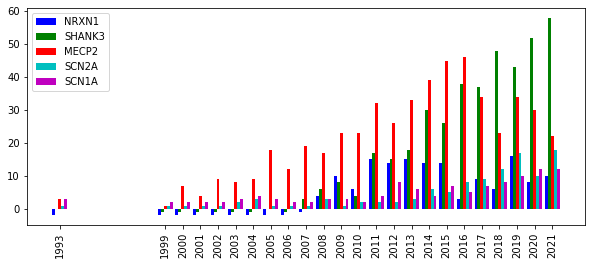

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

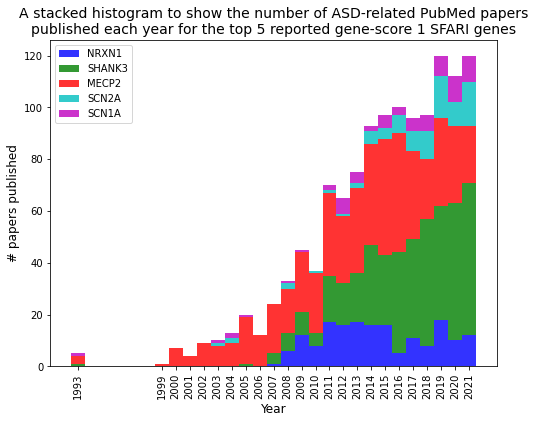

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

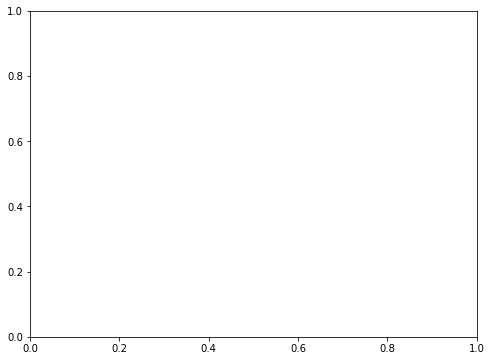

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


Text(0, 0.5, '# papers published')

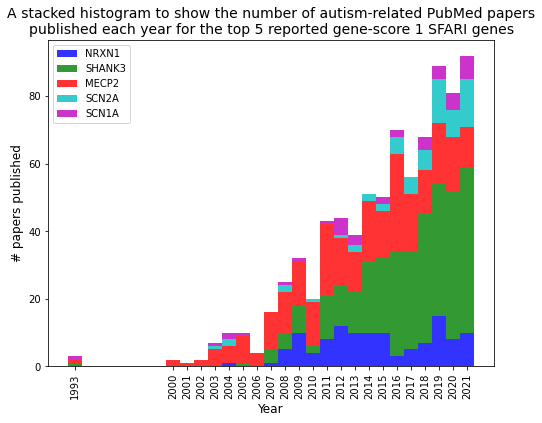

In [254]:
years = np.arange(2000,2022)
year_labels = np.insert(years, 0, 1993)
year_range = np.arange(1993,2023)
n_bins = year_labels.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, year_range, density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(year_labels+0.5, year_labels, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

Text(0, 0.5, '# papers published')

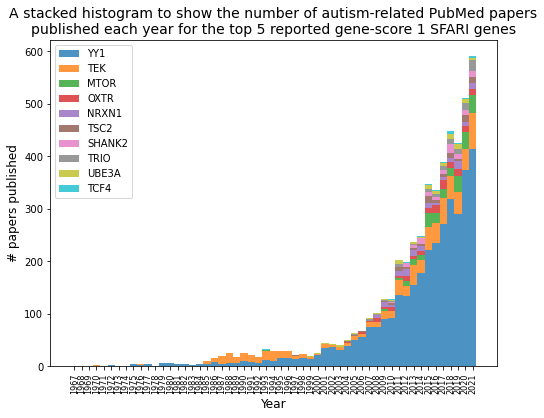

In [281]:
years = np.arange(1967,2022,1)
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(new_years, range(1967,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90, fontsize=8)
plt.title("A stacked histogram to show the 10 SFARI genes with the highest number of autism-related PubMed articles published each year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [283]:
data.iloc[996]

status                                                              9
gene-symbol                                                       YY1
gene-name                                     YY1transcription factor
ensembl-id                                            ENSG00000100811
chromosome                                                         14
genetic-category     Rare Single Gene Mutation, Syndromic, Functional
gene-score                                                        NaN
syndromic                                                           1
number-of-reports                                                   5
Name: 996, dtype: object